<h1> Nobel prizes comprehensive analysis </h1>

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src="static/nobel.jpg">

In this project we are going to see what patterns we can find in the data set of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [54]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook data format

In [55]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [56]:
df_data = pd.read_csv('data/nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

In [57]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [58]:
df_data.shape

(962, 16)

In [59]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

<h3> First and last nobel prize winners in data set </h3>

In [61]:
first_nobel_prize_idx = df_data.year.idxmin()
df_data.iloc[first_nobel_prize_idx]

year                                                                  1901
category                                                         Chemistry
prize                                    The Nobel Prize in Chemistry 1901
motivation               "in recognition of the extraordinary services ...
prize_share                                                            1/1
laureate_type                                                   Individual
full_name                                     Jacobus Henricus van 't Hoff
birth_date                                                      1852-08-30
birth_city                                                       Rotterdam
birth_country                                                  Netherlands
birth_country_current                                          Netherlands
sex                                                                   Male
organization_name                                        Berlin University
organization_city        

In [62]:
last_year_in_df_idx = df_data.year.idxmax()
df_data.iloc[last_year_in_df_idx]

year                                                                  2020
category                                                         Chemistry
prize                                    The Nobel Prize in Chemistry 2020
motivation               “for the development of a method for genome ed...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                           Emmanuelle Charpentier
birth_date                                                      1968-12-11
birth_city                                                 Juvisy-sur-Orge
birth_country                                                       France
birth_country_current                                               France
sex                                                                 Female
organization_name                                      Max-Planck-Institut
organization_city        

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [63]:
df_data.duplicated().sum()

np.int64(0)

### Check for NaN Values

In [64]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [65]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


Filtering on the NaN values in the birth date column we see that we get back a bunch of organisations, like the UN or the Red Cross. We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In addition, when we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

#### Type conversions troughout data frame and prepairing series for analysis

In [66]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [67]:
def to_percent(string):
	return eval(string) * 100

share_pct = df_data.prize_share.apply(to_percent)
df_data.insert(4, 'share_pct', share_pct)

<h2>Plotly Donut Chart: Percentage of Male vs. Female Laureates</h2>


In [68]:
sex_chart = df_data.sex.value_counts()
fig = px.pie(labels=sex_chart.index,
			 values=sex_chart.values,
			 title="Male vs Female Nobel price winners",
			 names=sex_chart.index,
			 # Additional options:
			 hole=0.4,  # Makes it a donut chart (0 to 1)
			 color_discrete_sequence=px.colors.qualitative.Vivid,  # Change colors
			 width=700,  # Width in pixels
			 height=500,  # Height in pixels
			 template='plotly_dark',  # Dark theme
			 opacity=0.8,  # Transparency of sections
			 )
#COLOR OPTIONS
#The available color options in the Plotly Express qualitative color sequences are:
#
# - Set3 (current)
# - Set1
# - Set2
# - Alphabet
# - Dark24
# - Light24
# - D3
# - G10
# - T10
# - Paired
# - Pastel
# - Prism
# - Safe
# - Vivid
# - Antique

fig.update_traces(
	textposition='outside',  # Text position: 'inside', 'outside', 'auto', 'none'
	textinfo='label+text+percent+value',  # Any combination of ['label', 'text', 'value', 'percent'] joined with '+' characters(e.g. 'label+text')
	pull=[0.1, 0],  # Pull slices out (list of values 0-1)
	marker=dict(line=dict(color='white', width=2))  # Slice borders
)

fig.update_layout(
	showlegend=True,
	legend=dict(orientation="v"),
	annotations=[dict(text="Nobel<br>Prizes", x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()


<h3>First 3 woman prize winners</h3>

In [69]:
df_data.head()
woman_winners = df_data.query("laureate_type=='Individual' and sex != 'Male'").sort_values("year", ascending=True)
woman_winners.head()

,year,category,prize,motivation,share_pct,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",25.00,1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,100.00,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",100.00,1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",100.00,1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",100.00,1/1,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Italy,Female,NaN,NaN,NaN,ITA


<h3>Multiple nobel prize winners</h3>


In [70]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}'
	  ' winners who were awarded the prize more than once.')


There are 6 winners who were awarded the prize more than once.


In [71]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


Marie Curie actually got the Nobel prize twice - once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars.

<h3>Number of Prizes per Category - prepare data for plot</h3>

In [72]:
num_of_prizes = df_data.groupby("category")["prize"].count().sort_values(ascending=False)

In [73]:
fig = px.bar(
	data_frame=num_of_prizes,
	x=num_of_prizes.index,
	y=num_of_prizes.values,
	title="Number of prizes per categories",
	hover_name=num_of_prizes.index,
	color=num_of_prizes.values,
	# Bar chart specific options:
	orientation='v',  # 'v' for vertical, 'h' for horizontal
	barmode='relative',  # 'relative', 'group', 'overlay'
	text=num_of_prizes.values,  # Show values on bars
	# Visual customization:
	color_continuous_scale='Plasma',  # Color scale options:
	# 'Viridis' - Default green-blue
	# 'Plasma' - Purple to orange
	# 'Inferno' - Black to yellow
	# 'Magma' - Black to pink
	# 'Cividis' - Blue to yellow
	# 'Warm' - Yellow to red
	# 'Cool' - Green to purple
	# 'YlOrRd' - Yellow to red
	# 'YlGnBu' - Yellow to blue
	# 'RdBu' - Red to blue
	# 'Greys' - White to black
	# 'YlOrBr' - Yellow to brown
	# 'BluRed' - Blue to red
	# 'RdYlBu' - Red yellow blue
	# 'Spectral' - Red to purple,
	opacity=0.8,  # Bar transparency
	width=800,  # Plot width
	height=500,  # Plot height
	template='plotly_dark',  # Plot theme options: 'ggplot2', 'seaborn', 'simple_white', 'plotly',
	# 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
	# 'ygridoff', 'gridon', 'none'
	labels={'x': 'Category', 'y': 'Number of Prizes'},  # Axis labels
	# Bar visual properties:
	# pattern_shape='/',  # Bar pattern: '/', '\', 'x', '+', '.', ''
	# hover_data={'value': True},  # Additional hover data
	error_y=None,  # Error bars
)

# Update layout
fig.update_layout(
	showlegend=True,
	bargap=0.2,  # Gap between bars
	bargroupgap=0.1,  # Gap between bar groups
	uniformtext_minsize=8,  # Minimum text size
	uniformtext_mode='hide',
	font=dict(size=14)# Text display mode
)

# Update traces
fig.update_traces(
	textposition='outside',
	texttemplate='%{text:.2f}',  # Text format
	marker_line_color='rgb(8,48,107)', # Bar border color
	textfont=dict(size=14),
	marker_line_width=1.5  # Bar border width
)

In [74]:
num_of_prizes = df_data.groupby("category")["prize"].count().sort_values(ascending=False)

fig = px.pie(
	data_frame=num_of_prizes,
	values=num_of_prizes.values,
	names=num_of_prizes.index,
	title="Number of prizes per categories",
	color=num_of_prizes.index,
	color_discrete_sequence=px.colors.sequential.Plasma,
	opacity=0.8,
	width=800,
	height=500,
	template='plotly_dark'
)

fig.update_traces(
	textposition='outside',
	textinfo='label+percent+value',
	marker_line_color='rgb(8,48,107)',
	marker_line_width=1.5,
	# Add 3D effect
	pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
)

# Create 3D effect using layout updates
fig.update_layout(
	showlegend=True,
	scene=dict(
		camera=dict(
			up=dict(x=0, y=0, z=1),
			center=dict(x=0, y=0, z=0),
			eye=dict(x=1.5, y=1.5, z=1.5)
		)
	)
)

fig.show()


<h4>First economy prize awarded</h4>

In [75]:
economy = df_data[df_data.category == 'Economics'].sort_values("year")
names = economy[economy.year == economy.year.min()]["full_name"]
names

393    Jan Tinbergen
394    Ragnar Frisch
Name: full_name, dtype: object

If we ask ourselves: "Why are there so few prizes in the field of economics?" The answer is: The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics.

<h3>Male and Female Winners by Category</h3>

In [76]:
man_women_split = df_data.groupby(["category", "sex"])["prize"].count()
man_women_split

category    sex   
Chemistry   Female      7
            Male      179
Economics   Female      2
            Male       84
Literature  Female     16
            Male      101
Medicine    Female     12
            Male      210
Peace       Female     17
            Male       90
Physics     Female      4
            Male      212
Name: prize, dtype: int64

In [77]:
man_women_split_df = man_women_split.reset_index()
fig = px.bar(man_women_split_df,
			 x='category',
			 y='prize',
			 color='sex',
			 title='Nobel Prizes by Category and Gender',
			 barmode='stack',
			 color_discrete_sequence=['#FF69B4','#4169E1'],  # Royal Blue and Hot pink
			 template='plotly_dark',
			 text='prize',
			 width=900,
			 height=600)

fig.update_traces(
	textposition='outside',
	texttemplate='%{value}',
	marker_line_color='#FFD700',  # Gold border
	marker_line_width=1.5,
	textfont=dict(
		family='Helvetica',
		size=14,
		color='white'
	),
	opacity=0.8,
	width=0.8  # Make bars wider by increasing width value
)

fig.update_layout(
	title_font_size=24,
	title_font_family='Helvetica',
	title_x=0.5,
	xaxis_title='Category',
	yaxis_title='Number of Prizes',
	legend_title='Gender',
	bargap=0.4,  # Reduced gap between bars
	xaxis_title_font_size=16,
	yaxis_title_font_size=16,
	legend_title_font_size=16,
	plot_bgcolor='rgba(0,0,0,0)',
	paper_bgcolor='rgba(0,0,0,0)',
	xaxis=dict(tickangle=45),  # Angling the x-axis labels
)

# Update text positions for better visibility
fig.update_traces(
	textposition=['outside' if x == 'Male' else 'inside' for x in man_women_split_df.sex],
	selector=dict(type='bar')
)

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace.

<h2>Number of Prizes Awarded Over Time</h2>

In [78]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   share_pct              962 non-null    float64       
 5   prize_share            962 non-null    object        
 6   laureate_type          962 non-null    object        
 7   full_name              962 non-null    object        
 8   birth_date             934 non-null    datetime64[ns]
 9   birth_city             931 non-null    object        
 10  birth_country          934 non-null    object        
 11  birth_country_current  934 non-null    object        
 12  sex                    934 non-null    object        
 13  organ

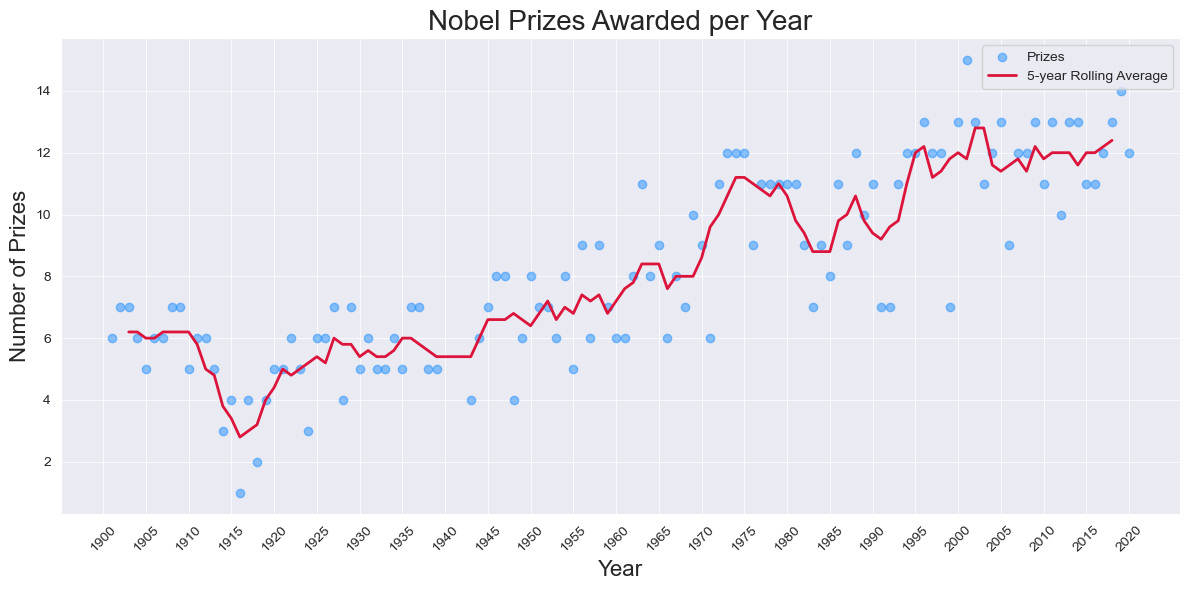

In [79]:
prizes_per_year = df_data.groupby("year")["prize"].count()

plt.figure(figsize=(12, 6))
plt.scatter(prizes_per_year.index, prizes_per_year.values,
			color='dodgerblue', alpha=0.5, label='Prizes')

# Calculate and plot rolling average
rolling_avg = prizes_per_year.rolling(window=5, center=True).mean()
plt.plot(rolling_avg.index, rolling_avg.values,
		 color='crimson', linewidth=2, label='5-year Rolling Average')

# Customize the plot
plt.grid(True, alpha=0.8)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Prizes', fontsize=16)
plt.title('Nobel Prizes Awarded per Year', fontsize=20)
plt.legend()

# Set x-axis ticks every 5 years
plt.xticks(np.arange(1900, 2021, 5), rotation=45)

plt.tight_layout()
plt.show()

# Are More Prizes Shared Than Before?

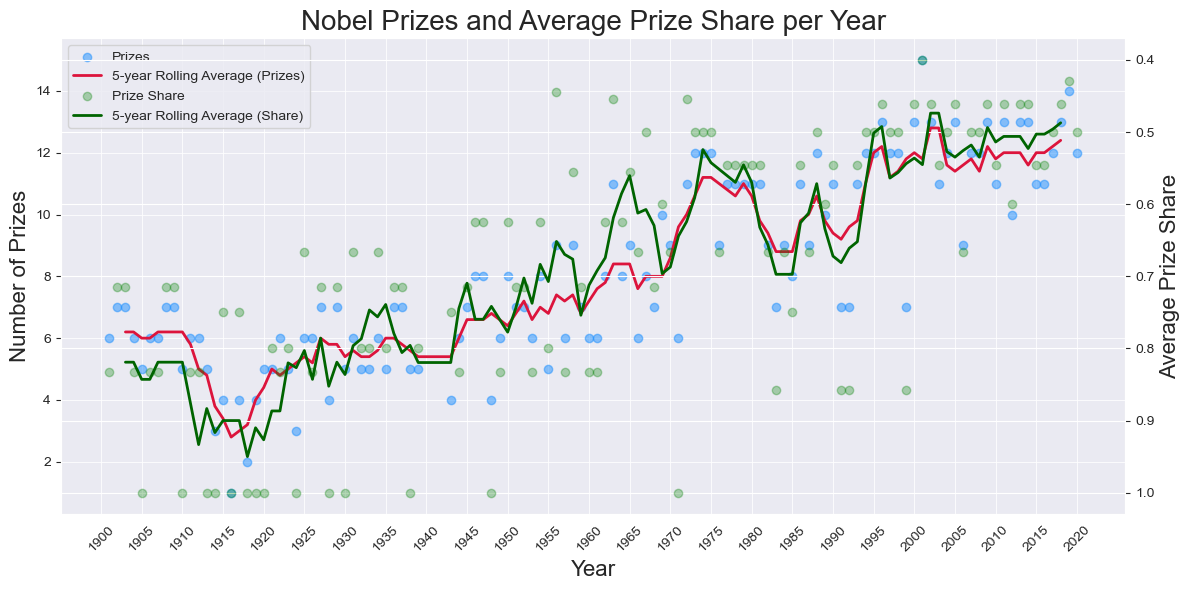

In [80]:
from fractions import Fraction

def to_fractal(string):
	return Fraction(string)

df_data_shares_fractals = df_data["prize_share"].apply(to_fractal)
df_data.insert(5, "prize_share_in_fractals", df_data_shares_fractals)
prize_share_per_year = df_data.groupby('year')['prize_share_in_fractals'].mean()

# Create figure with primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot prizes data on primary axis
ax1.scatter(prizes_per_year.index, prizes_per_year.values,
			color='dodgerblue', alpha=0.5, label='Prizes')

# Calculate and plot rolling average for prizes
rolling_avg_prizes = prizes_per_year.rolling(window=5, center=True).mean()
ax1.plot(rolling_avg_prizes.index, rolling_avg_prizes.values,
		 color='crimson', linewidth=2, label='5-year Rolling Average (Prizes)')

# Create secondary axis
ax2 = ax1.twinx()

# Plot prize share data on secondary axis
ax2.scatter(prize_share_per_year.index, prize_share_per_year.values,
			color='green', alpha=0.3, label='Prize Share')

# Calculate and plot rolling average for prize share
rolling_avg_share = prize_share_per_year.rolling(window=5, center=True).mean()
ax2.plot(rolling_avg_share.index, rolling_avg_share.values,
		 color='darkgreen', linewidth=2, label='5-year Rolling Average (Share)')

# Customize primary axis
ax1.grid(True, alpha=0.8)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Number of Prizes', fontsize=16)
ax1.set_title('Nobel Prizes and Average Prize Share per Year', fontsize=20)

# Customize secondary axis
ax2.set_ylabel('Average Prize Share', fontsize=16)
# Remove invert_yaxis() line since it makes relationship less clear
ax2.invert_yaxis()

# Set x-axis ticks
ax1.set_xticks(np.arange(1900, 2021, 5))
ax1.tick_params(axis='x', rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


There is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Instead of there being a zero entry for those years, we instead see the effect of the wars as missing blue dots.

# The Countries with the Most Nobel Prizes

In [81]:
top_20_countries = df_data.groupby(["birth_country_current"], as_index=False).agg(prize=("birth_country_current", "count")).sort_values("prize", ascending=False)[:20]
top_20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
57,Poland,27
40,Japan,27
61,Russia,26
11,Canada,20
39,Italy,19


Looking at our DataFrame there are actually 3 different columns to choose from for creating this ranking: birth_country, birth_country_current or organization_country. However, they each have certain problems and limitations.

If you look at the entries in the birth country, you'll see that some countries no longer exist! These include the Soviet Union or Czechoslovakia for example. Hence, using birth_country_current is better, since it has the country name which controls the city where the laureate was born. Now, notice that this does not determine the laureates' nationality since some globetrotting folks gave birth to their future Nobel laureate children while abroad. Also, people's nationalities can change as they emigrate and acquire different citizenship or get married and change citizenship. What this boils down to is that we will have to be clear about the assumptions that we will make in the upcoming analysis.

In [82]:
h_bar = px.bar(
	data_frame=top_20_countries,
	x="prize",
	y="birth_country_current",
	orientation="h",
	title="Top 20 Countries by Nobel Prize Winners",
	color="prize",  # Add color gradient based on values  
	color_continuous_scale="Viridis",  # Use Viridis color scale
	template="plotly_dark",  # Use dark template for better contrast
	width=1000,  # Increase width
	height=800,  # Increase height
	text="prize"  # Show values on bars
)

# Update layout
h_bar.update_layout(
	xaxis_title="Number of Nobel Prizes",
	yaxis_title="Country",
	font=dict(size=12),  # Increase font size
	showlegend=True,
	bargap=0.2,  # Adjust gap between bars
	yaxis=dict(autorange="reversed")  # Invert y-axis
)

# Update traces
h_bar.update_traces(
	textposition='outside',  # Show values outside bars
	texttemplate='%{text}',
	marker_line_color='rgb(8,48,107)',
	marker_line_width=1.5,
	opacity=0.8
)

# Show horizontal bar chart
h_bar.show()


The United States has a massive number of prizes by this measure. The UK and Germany are in second and third place respectively.

# Presenting Number of Prizes Won by Country using Choropleth Map

In [83]:
import plotly.express as px

# Prepare data by renaming column for choropleth mapping
choropleth_data = top_20_countries.rename(columns={'birth_country_current': 'country'})

# Create choropleth map
fig = px.choropleth(
	# Required parameters
	data_frame=choropleth_data,  # DataFrame containing the data
	locations='country',  # Column name with location names
	locationmode='country names',  # How locations are specified ('country names', 'ISO-3', 'USA-states', etc)
	color='prize',  # Column name determining color values
	title='Nobel Prizes by Country',  # Title of the plot

	# Visual customization
	color_continuous_scale='Inferno',  # Color scale ('Plasma','Viridis','Inferno','RdBu', etc)
	template='plotly_dark',  # Plot template ('plotly','plotly_white','ggplot2', etc)
	width=1000,  # Width in pixels
	height=800,  # Height in pixels
	labels={'prize': 'Number of Nobel Prizes'},  # Custom labels for hover text

	# Additional optional parameters:
	# animation_frame=None,           # Column to be used for animation frames
	# range_color=[min,max],         # Range for color scale
	# center=None,                   # Dict of form {'lat':x,'lon':y}
	# scope=None,                    # Scope of map ('world','usa','europe','asia',etc)
	# projection=None                # Map projection type
)

# Update layout settings
fig.update_layout(
	title_x=0.5,  # Center title
	geo=dict(
		showframe=False,  # Hide frame around map
		showcoastlines=True,  # Show coastlines
		projection_type='equirectangular',  # Map projection type
		showland=True,  # Show land masses
		showcountries=True,  # Show country borders
		landcolor='rgb(243, 243, 243)',  # Land color
		countrycolor='rgb(204, 204, 204)',  # Country border color
		# bgcolor='rgba(0,0,0,0)',   # Background color
		# oceancolor='rgb(230,230,250)', # Ocean color
		# countrywidth=0.5,          # Width of country borders
		# coastlinewidth=0.5,        # Width of coastlines
		# resolution=50              # Resolution of coastlines
	),
	margin={"r": 0, "t": 30, "l": 0, "b": 0}  # Adjust margins
)

fig.show()


In [84]:
top_20_countries_with_categories = df_data.groupby(["birth_country_current", "category"]).agg(prize=("birth_country_current", "count")).sort_values("prize", ascending=False)
top_20_countries_with_categories.index

MultiIndex([('United States of America',   'Medicine'),
            ('United States of America',    'Physics'),
            ('United States of America',  'Chemistry'),
            ('United States of America',  'Economics'),
            (          'United Kingdom',   'Medicine'),
            (          'United Kingdom',  'Chemistry'),
            (                 'Germany',  'Chemistry'),
            (                 'Germany',    'Physics'),
            (          'United Kingdom',    'Physics'),
            ('United States of America',      'Peace'),
            ...
            (                 'Romania',      'Peace'),
            (             'Switzerland', 'Literature'),
            (                 'Ukraine',  'Chemistry'),
            (                  'Taiwan',  'Chemistry'),
            (                'Trinidad', 'Literature'),
            (                  'Turkey',  'Chemistry'),
            (               'Venezuela',   'Medicine'),
            (                 'V

In [85]:
# top_20_countries = df_data.groupby('birth_country_current').agg(prize=('birth_country_current', 'count')).sort_values('prize', ascending=False).head(20).index.tolist()
#
# chart_data = df_data[df_data['birth_country_current'].isin(top_20_countries)].copy()
cat_country = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

merged_df = pd.merge(cat_country, top_20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)

h_bar = px.bar(
	data_frame=merged_df,
	x='cat_prize',
	y='birth_country_current',
	color='category',
	orientation='h',
	title='Top Countries by Nobel Prize Winners and Categories',
	template='plotly_dark',
	width=1200,
	height=800,
	text='cat_prize'
)

# Update layout
h_bar.update_layout(
	xaxis_title='Number of Nobel Prizes',
	yaxis_title='Country',
	font=dict(size=12),
	showlegend=True,
	bargap=0.2,
	yaxis=dict(autorange='reversed'),
	barmode='stack'
)

# Update traces
h_bar.update_traces(
	textposition='inside',
	texttemplate='%{text}',
	marker_line_color='rgb(8,48,107)',
	marker_line_width=1.5,
	opacity=0.8
)

h_bar.show()


Insights:What we can see is that the US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.

<h2>Number of Prizes Won by Each Country Over Time</h2>

In [86]:
df_data.head()

,year,category,prize,motivation,share_pct,prize_share_in_fractals,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",100.00,1,1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",100.00,1,1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",100.00,1,1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,1/2,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,1/2,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [87]:
prize_by_year = df_data.groupby(by=["birth_country_current", "year"], as_index=False).count()
prize_by_year = prize_by_year.sort_values("year")[["year", "birth_country_current", "prize"]]
prize_by_year

,year,birth_country_current,prize
312,1901,Netherlands,1
346,1901,Poland,1
118,1901,France,2
159,1901,Germany,1
440,1901,Switzerland,1
...,...,...,...
244,2019,India,1
221,2020,Germany,1
158,2020,France,1
533,2020,United Kingdom,2


In [88]:
cumulative_prizes = prize_by_year.groupby(by=["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [89]:
l_chart = px.line(cumulative_prizes,
				  x='year',
				  y='prize',
				  color='birth_country_current',
				  hover_name='birth_country_current',
				  title='Cumulative Nobel Prizes by Country Over Time',
				  template='plotly_dark',
				  color_discrete_sequence=px.colors.qualitative.Set3,
				  width=1200,
				  height=800)

l_chart.update_layout(
	xaxis_title='Year',
	yaxis_title='Number of Prizes',
	title_x=0.5,
	legend_title='Country',
	font=dict(size=14),
	showlegend=True,
	legend=dict(
		orientation='v',  # Changed to vertical
		y=1,  # Moved to top
		x=1.1  # Moved to right side
	)
)

l_chart.update_traces(
	line=dict(width=3),  # Increased line thickness
	opacity=0.8
)

# Show only top 20 countries
n_countries = 20  # Number of countries to show
top_countries = cumulative_prizes.groupby('birth_country_current')['prize'].max().nlargest(n_countries).index
l_chart.for_each_trace(lambda trace: trace.update(visible='legendonly') if trace.name not in top_countries else ())


What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too.

# Use of Plotly Sunburst Chart in combining country, city and organisation

In [90]:
df_data.dropna(inplace=True)
org_df = df_data.groupby("organization_name").agg(num_of_prizes=("prize", "count")).reset_index()
org_df = org_df.sort_values(by=["num_of_prizes"], ascending=False)
org_df

,organization_name,num_of_prizes
194,University of California,40
68,Harvard University,28
166,Stanford University,23
116,Massachusetts Institute of Technology (MIT),21
196,University of Chicago,20
...,...,...
237,Université Louis Pasteur,1
235,Université Catholique de Louvain,1
232,University of Waterloo,1
260,École municipale de physique et de chimie indu...,1


In [91]:
h_bar = px.bar(
	data_frame=org_df[:20],
	x="num_of_prizes",
	y="organization_name",
	orientation="h",
	title="Top 20 organizations involved in Nobel Prize Winnings",
	color="num_of_prizes",  # Add color gradient based on values
	color_continuous_scale="Viridis",  # Use Viridis color scale
	template="plotly_dark",  # Use dark template for better contrast
	width=1000,  # Increase width
	height=800,  # Increase height
	text="num_of_prizes"  # Show values on bars
)

# Update layout
h_bar.update_layout(
	xaxis_title="Number of Nobel Prizes",
	yaxis_title="Institution",
	font=dict(size=12),  # Increase font size
	showlegend=True,
	bargap=0.2,  # Adjust gap between bars
	yaxis=dict(autorange="reversed")  # Invert y-axis
)

# Update traces
h_bar.update_traces(
	textposition='outside',  # Show values outside bars
	texttemplate='%{text}',
	marker_line_color='rgb(8,48,107)',
	marker_line_width=1.5,
	opacity=0.8
)

# Show horizontal bar chart
h_bar.show()

In [92]:
hot_spot_cities = df_data.groupby(by=["organization_city"], as_index=False)["prize"].count().reset_index()
hot_spot_cities.sort_values("prize", ascending=False, inplace=True)
plot_data = hot_spot_cities[:20][["organization_city", "prize"]].reset_index()
hot_spot_cities.head()

h_bar = px.bar(
	data_frame=plot_data,
	x="prize",
	y="organization_city",
	orientation="h",
	title="Top 20 cities involved in Nobel Prize Winnings",
	color="prize",  # Add color gradient based on values
	color_continuous_scale="Viridis",  # Use Viridis color scale
	template="plotly_dark",  # Use dark template for better contrast
	width=1000,  # Increase width
	height=800,  # Increase height
	text="prize"  # Show values on bars
)

# Update layout
h_bar.update_layout(
	xaxis_title="Number of Nobel Prizes",
	yaxis_title="City",
	font=dict(size=12),  # Increase font size
	showlegend=True,
	bargap=0.2,  # Adjust gap between bars
	yaxis=dict(autorange="reversed")  # Invert y-axis
)

# Update traces
h_bar.update_traces(
	textposition='outside',  # Show values outside bars
	texttemplate='%{text}',
	marker_line_color='rgb(8,48,107)',
	marker_line_width=1.5,
	opacity=0.8
)

# Show horizontal bar chart
h_bar.show()


A higher population definitely means that there's a higher chance of a Nobel laureate to be born there. New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

In [93]:
country_city_org = df_data.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_city_org = country_city_org.sort_values('prize', ascending=False)

fig = px.sunburst(
	country_city_org,
	path=['organization_country', 'organization_city', 'organization_name'],
	values='prize',
	title='Distribution of Nobel Prizes by Country, City and Organization',
	template='plotly_dark',
	width=1000,
	height=1000,
	color='prize',
	color_continuous_scale='Plasma'
)

fig.update_layout(
	font=dict(size=12),
	title_x=0.5,
)

fig.update_traces(
	textinfo='label+value',
	hovertemplate='<b>%{label}</b><br>Prizes: %{value}<extra></extra>'
)

fig.show()


Each country has a number of cities, which contain a number of cities, which in turn contain the research organisations. That's why sunburst chart is a perfect one for this kind of presentations.

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award

In [94]:
df_data.head()

,year,category,prize,motivation,share_pct,prize_share_in_fractals,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",100.00,1,1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",100.00,1,1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",100.00,1,1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",100.00,1,1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",100.00,1,1/1,Individual,Ronald Ross,1857-05-13,Almora,India,India,Male,University College London,Liverpool,United Kingdom,IND


In [95]:
winning_age = df_data.year - df_data.birth_date.dt.year
df_data.insert(6, "winning_age", winning_age)

In [96]:
df_data.head()

,year,category,prize,motivation,share_pct,prize_share_in_fractals,winning_age,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",100.00,1,49,1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",100.00,1,47,1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",100.00,1,56,1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",100.00,1,50,1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",100.00,1,45,1/1,Individual,Ronald Ross,1857-05-13,Almora,India,India,Male,University College London,Liverpool,United Kingdom,IND


In [97]:
the_oldest_winner = df_data.winning_age.max()
the_oldest_winner_idx = df_data.winning_age.idxmax()
the_oldest_winner_idx

np.int64(937)

In [98]:
the_oldest_winner_prize = df_data.loc[the_oldest_winner_idx] #IMPORTANT iloc does not work here, no matter while the_oldest_winner_idx is int number
the_oldest_winner_prize

year                                                                 2019
category                                                        Chemistry
prize                                   The Nobel Prize in Chemistry 2019
motivation                 “for the development of lithium-ion batteries”
share_pct                                                           33.33
prize_share_in_fractals                                               1/3
winning_age                                                            97
prize_share                                                           1/3
laureate_type                                                  Individual
full_name                                                 John Goodenough
birth_date                                            1922-07-25 00:00:00
birth_city                                                           Jena
birth_country                                                     Germany
birth_country_current                 

In [99]:
the_youngest_winner = df_data.winning_age.min()
the_youngest_winner_idx = df_data.winning_age.idxmin()

In [100]:
the_youngest_winner_prize = df_data.loc[the_youngest_winner_idx]
the_youngest_winner_prize

year                                                                    1915
category                                                             Physics
prize                                        The Nobel Prize in Physics 1915
motivation                 "for their services in the analysis of crystal...
share_pct                                                              50.00
prize_share_in_fractals                                                  1/2
winning_age                                                               25
prize_share                                                              1/2
laureate_type                                                     Individual
full_name                                             William Lawrence Bragg
birth_date                                               1890-03-31 00:00:00
birth_city                                                          Adelaide
birth_country                                                      Australia

In [101]:
df_data.winning_age.describe()

count   698.00
mean     58.81
std      12.56
min      25.00
25%      49.25
50%      58.50
75%      68.00
max      97.00
Name: winning_age, dtype: float64

Insights: John Goodenough was 97 years old when he got the Nobel prize!!! Interestingly John was born to American parents while they were in Germany. This is one example where our analysis of countries counts an extra "German" prize even though he is an American citizen. Too bad we don't have a nationality column in our dataset! Nonetheless, this goes to show it is never too late to win a Nobel prize.

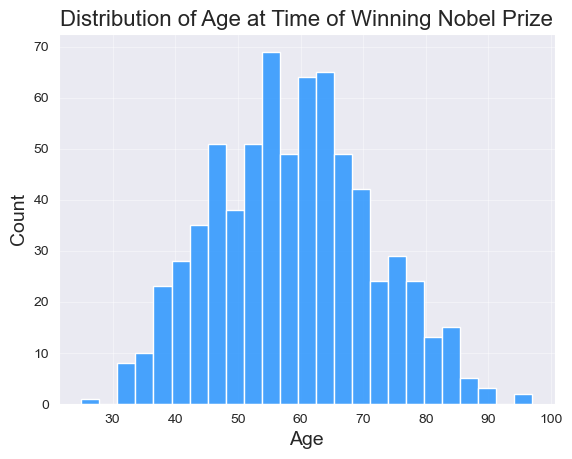

In [102]:
plot_data_age_distr = df_data["winning_age"]
sns.histplot(data=plot_data_age_distr,
			 bins=25,
			 color='dodgerblue',
			 alpha=0.8)
plt.title('Distribution of Age at Time of Winning Nobel Prize', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.style.use('dark_background')
plt.grid(True, alpha=0.4)
plt.show()


The histogram above shows us the distribution across the entire dataset, over the entire time period. But as we are going to see, the age has changed over time.

In [103]:
df_data.winning_age.describe()

count   698.00
mean     58.81
std      12.56
min      25.00
25%      49.25
50%      58.50
75%      68.00
max      97.00
Name: winning_age, dtype: float64

### Age at Time of Award throughout History

In [105]:
plot_data_nominates = df_data.groupby(by="year").winning_age.mean().reset_index()
plot_data_nominates.sort_values("year", ascending=True, inplace=True)
plot_data_nominates

,year,winning_age
0,1901,50.67
1,1902,45.25
2,1903,45.50
3,1904,56.33
4,1905,58.33
...,...,...
111,2016,70.78
112,2017,72.71
113,2018,72.10
114,2019,67.50


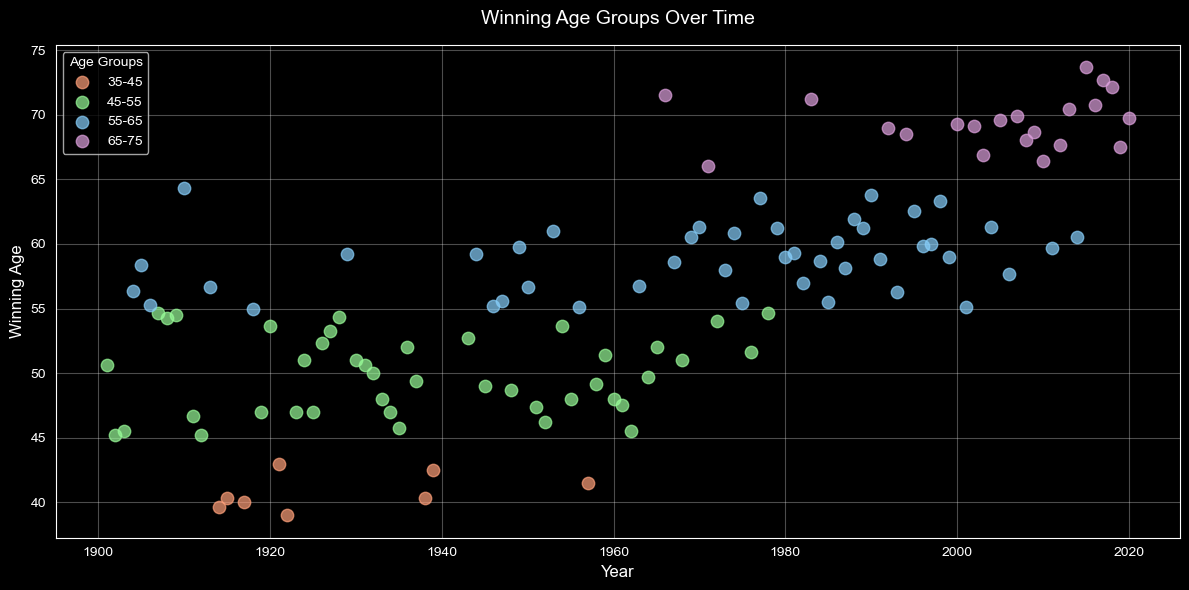

In [113]:
plt.figure(figsize=(12, 6))
age_ranges = [(35, 45), (45, 55), (55, 65), (65, 75)]
colors = ['#FFA07A', '#98FB98', '#87CEFA', '#DDA0DD']

for (min_age, max_age), color in zip(age_ranges, colors):
    mask = (plot_data_nominates['winning_age'] >= min_age) & (plot_data_nominates['winning_age'] < max_age)
    plt.scatter(plot_data_nominates.loc[mask, 'year'],
                plot_data_nominates.loc[mask, 'winning_age'],
                label=f'{min_age}-{max_age}', c=color, alpha=0.7, s=80)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Winning Age', fontsize=12)
plt.title('Winning Age Groups Over Time', fontsize=14, pad=15)
plt.legend(title='Age Groups')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

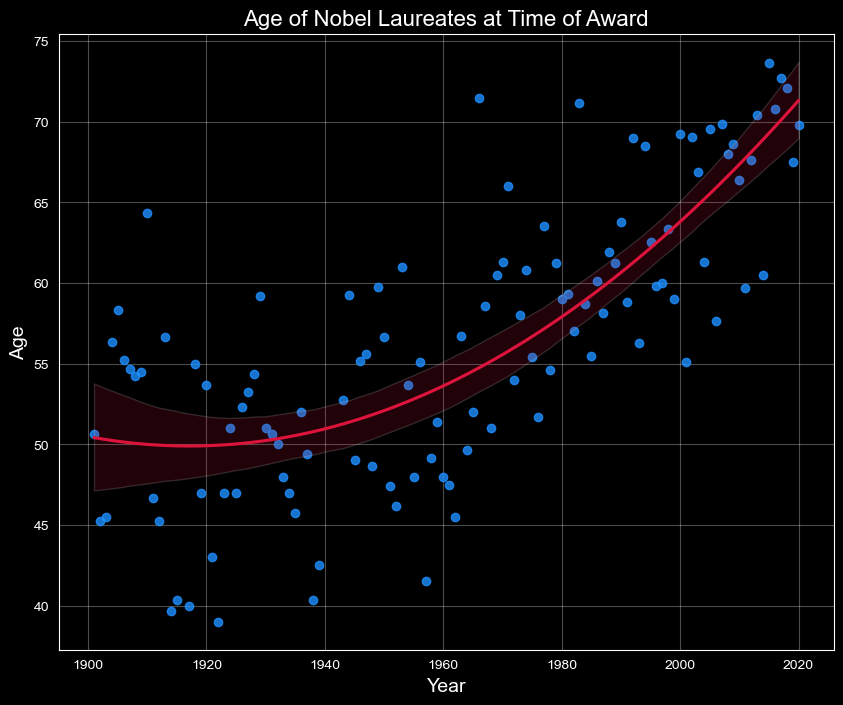

In [114]:
plt.style.use('dark_background')

# Set figure size
plt.figure(figsize=(10, 8))  # equivalent to 800x800 pixels

# Plot
sns.regplot(
    data=plot_data_nominates,
    x='year',
    y='winning_age',
    color='dodgerblue',
    line_kws={'color': 'crimson'},
    order=2,
	# lowess=True
)

# Labels
plt.title('Age of Nobel Laureates at Time of Award', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Grid
plt.grid(True, alpha=0.3)

# Show plot
plt.show()

Using the lowess and order parameters allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

In [108]:
by_categories = df_data[["category", "winning_age"]].reset_index()
by_categories



,index,category,winning_age
0,0,Chemistry,49
1,2,Medicine,47
2,5,Physics,56
3,6,Chemistry,50
4,8,Medicine,45
...,...,...,...
693,955,Medicine,68
694,956,Medicine,85
695,959,Physics,55
696,960,Physics,68


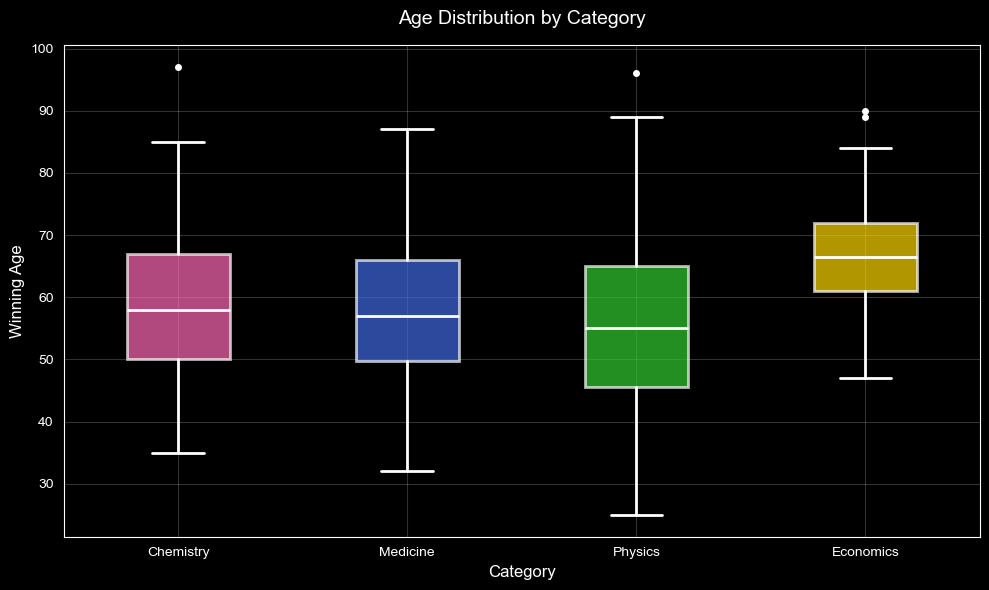

In [115]:
plt.figure(figsize=(10, 6))

colors = ['#FF69B4', '#4169E1', '#32CD32', '#FFD700', '#9370DB', '#FF7F50', '#00FFFF', '#FF4500', '#7FFF00', '#FF1493']
box_props = dict(linestyle='-', linewidth=2, color='white')
whisker_props = dict(linestyle='-', linewidth=2, color='white')
cap_props = dict(linewidth=2, color='white')
median_props = dict(linewidth=2, color='white')
flier_props = dict(marker='o', markerfacecolor='white', markersize=4)

plt.boxplot([by_categories[by_categories['category'] == cat]['winning_age']
			 for cat in by_categories['category'].unique()],
			tick_labels=by_categories['category'].unique(),
			patch_artist=True,  # Fill boxes with color
			boxprops=box_props,
			whiskerprops=whisker_props,
			capprops=cap_props,
			medianprops=median_props,
			flierprops=flier_props)

# Color the boxes
boxes = plt.gca().patches
for box, color in zip(boxes, colors):
	box.set_facecolor(color)
	box.set_alpha(0.7)

plt.style.use('dark_background')
plt.title('Age Distribution by Category', fontsize=14, pad=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Winning Age', fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


To get a more complete picture, we should look at how the age of winners has changed over time. The box plot above looked at the dataset as a whole.


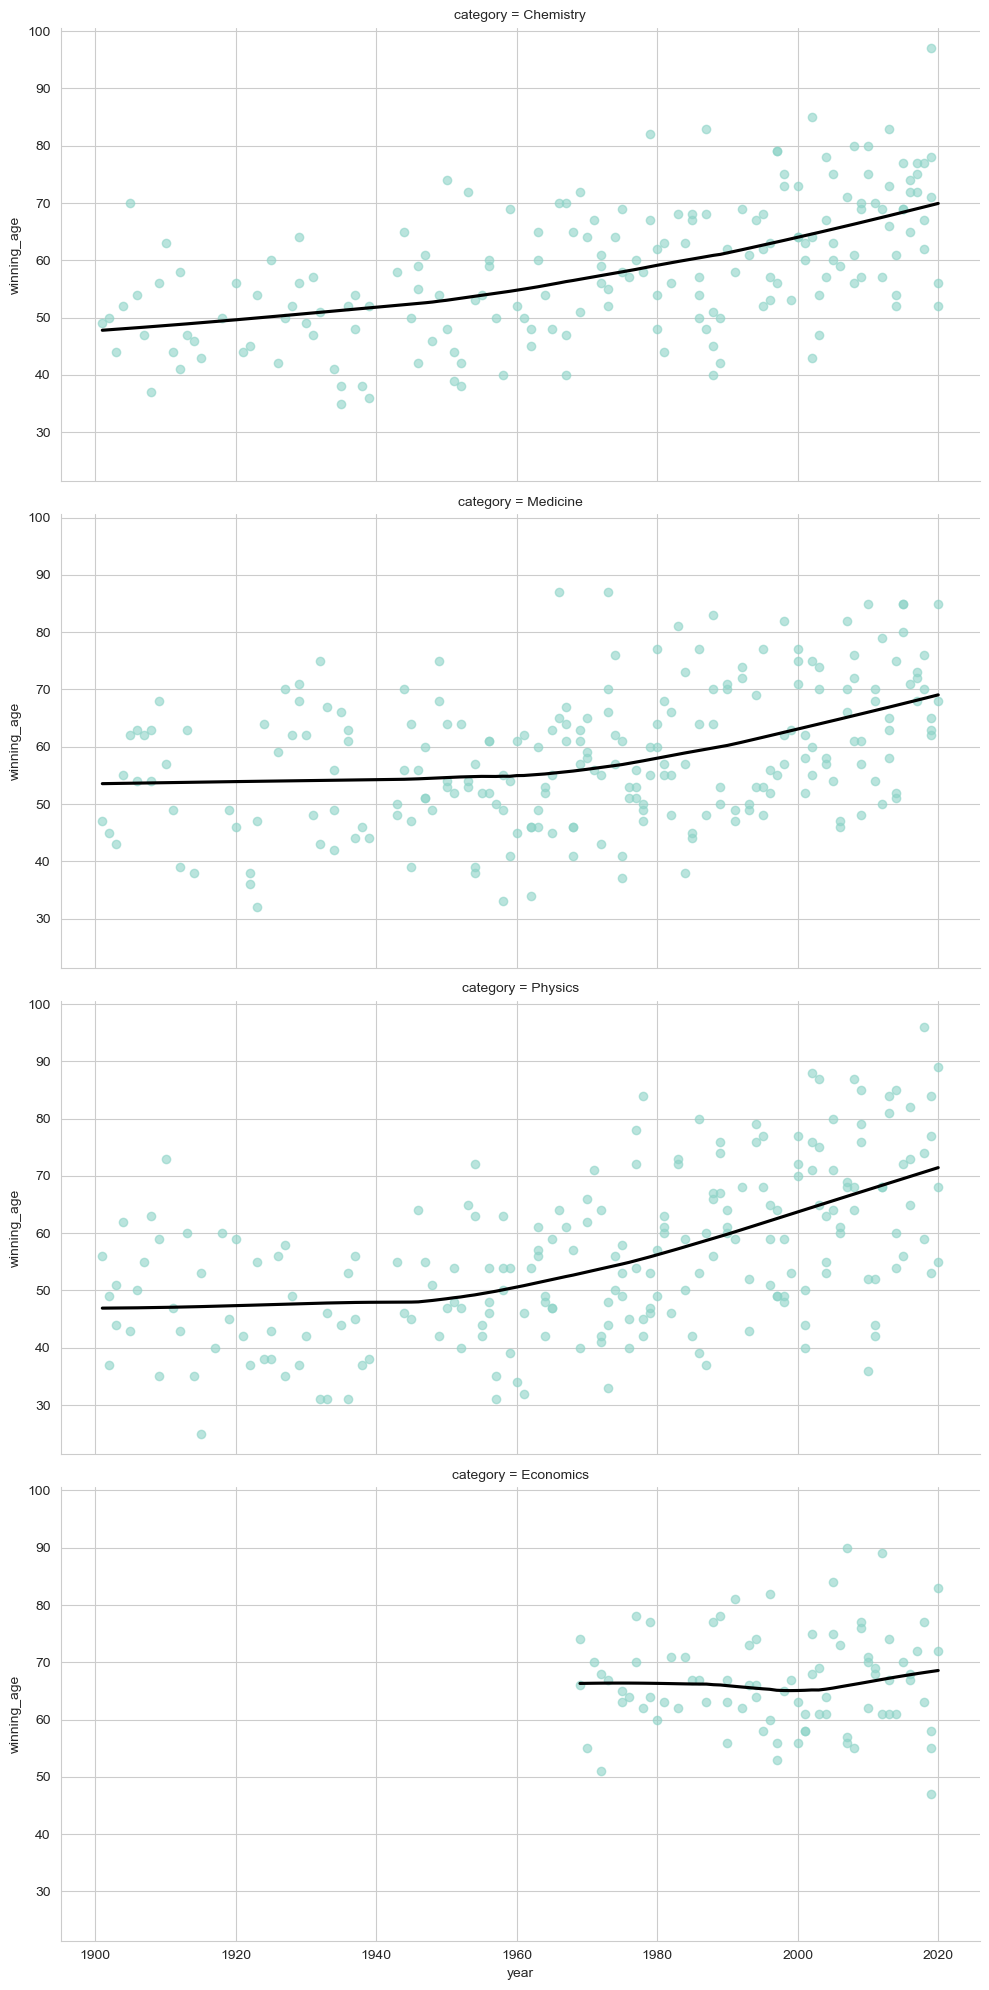

In [110]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               row = 'category',
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger! As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!

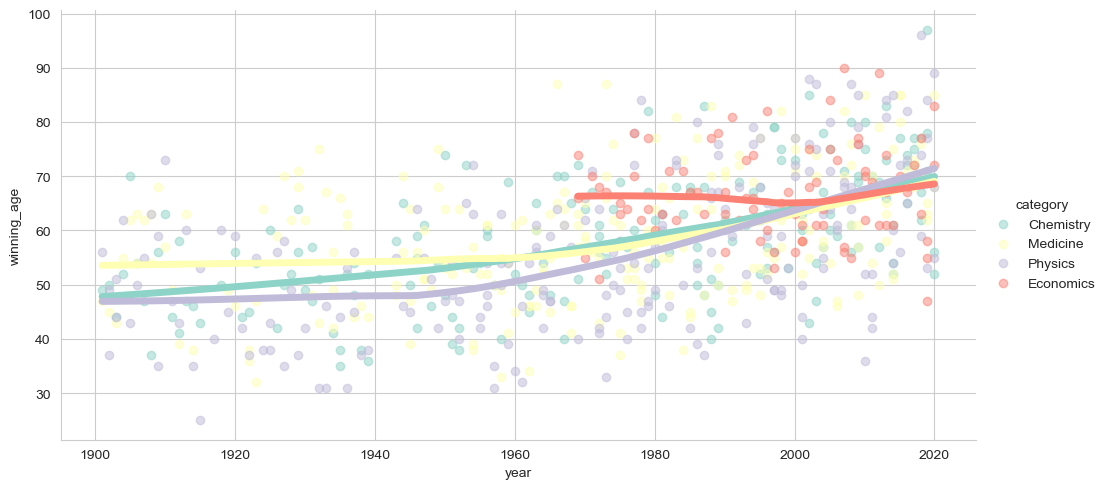

In [116]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.show()

To combine all these charts into the same chart, I use here the hue parameter in the chart above and it was my final touch for this project. I do hope you enjoyed this analysis so far. Thanks for stopping by!